# Assignment 1: Dimensionality Reduction using PCA

# Part A

1. Retrieve and load the mnist_784 dataset of 70,000 instances.

In [17]:
from sklearn.datasets import fetch_openml
import numpy as np

# 1. Retrieve and load the mnist_784 dataset of 70,000 instances.
mnist = fetch_openml(name='mnist_784')

X, y = mnist["data"], mnist["target"]

print(f"Shape of data: {X.shape}")
print(f"Shape of target: {y.shape}")

Shape of data: (70000, 784)
Shape of target: (70000,)


2. Display each digit

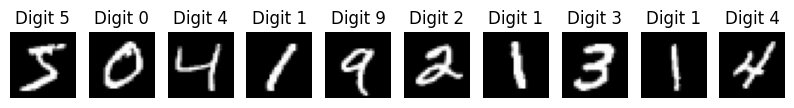

Displayed the first 10 digits from the MNIST dataset.


In [18]:
import cv2

import matplotlib.pyplot as plt

# Normalize the data
X = X / 255.0
y = y.astype(int)

# Display each digit
num_digits_to_display = 10  
plt.figure(figsize=(10, 1))  

for i in range(num_digits_to_display):
    digit_image = X.iloc[i].values.reshape(28, 28) 
    plt.subplot(1, num_digits_to_display, i + 1)
    plt.imshow(digit_image, cmap='gray')
    plt.title(f'Digit {y[i]}')
    plt.axis('off')

plt.show()

# Message after displaying the digits
print(f"Displayed the first {num_digits_to_display} digits from the MNIST dataset.")


3. Use PCA to retrieve 1th and 2nd principal component and output their explained variance ratio.

In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)


In [20]:
# Output the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: Explained Variance Ratio = {ratio * 100:.2f}%")

# Total explained variance ratio
total_explained_variance_ratio = explained_variance_ratio.sum()
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio * 100:.2f}")

Principal Component 1: Explained Variance Ratio = 9.75%
Principal Component 2: Explained Variance Ratio = 7.16%
Total Explained Variance Ratio: 16.90


3. Plot the projections of the 1th and 2nd principal component onto a 1D hyperplane to show how the data points are distributed along each principal component axis individually. The histogram plots satisfy this requirement.

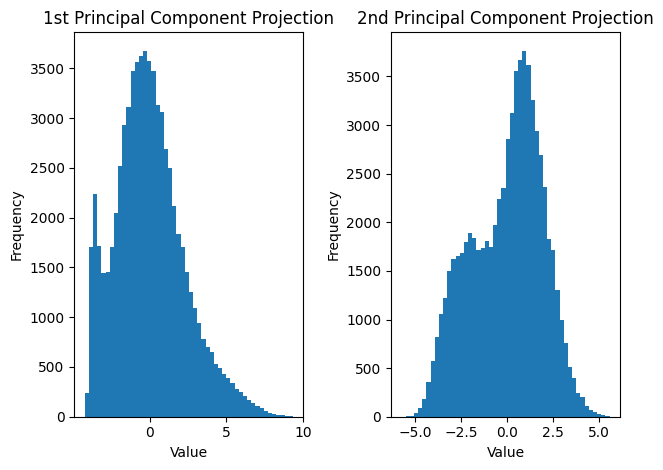

In [21]:
# Plot 1st principal component projection
plt.subplot(121)
plt.hist(X_reduced_pca[:, 0], bins=50)
plt.title("1st Principal Component Projection")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot 2nd principal component projection
plt.subplot(122)
plt.hist(X_reduced_pca[:, 1], bins=50)
plt.title("2nd Principal Component Projection")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.

In [22]:
from sklearn.decomposition import IncrementalPCA

incremental_pca = IncrementalPCA(n_components=154, batch_size=1000)

# Fit and transform the data in batches
X_reduced_ipca = incremental_pca.fit_transform(X)

In [23]:
# Output the explained variance ratio of each principal component in percentage
explained_variance_ratio = incremental_pca.explained_variance_ratio_

# Explained variance ratio in percentage
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: Explained Variance Ratio = {ratio * 100:.2f}%")

# Total explained variance ratio in percentage
total_explained_variance_ratio = explained_variance_ratio.sum()
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio * 100:.2f}%")

Principal Component 1: Explained Variance Ratio = 9.75%
Principal Component 2: Explained Variance Ratio = 7.16%
Principal Component 3: Explained Variance Ratio = 6.15%
Principal Component 4: Explained Variance Ratio = 5.40%
Principal Component 5: Explained Variance Ratio = 4.89%
Principal Component 6: Explained Variance Ratio = 4.31%
Principal Component 7: Explained Variance Ratio = 3.28%
Principal Component 8: Explained Variance Ratio = 2.89%
Principal Component 9: Explained Variance Ratio = 2.76%
Principal Component 10: Explained Variance Ratio = 2.34%
Principal Component 11: Explained Variance Ratio = 2.11%
Principal Component 12: Explained Variance Ratio = 2.04%
Principal Component 13: Explained Variance Ratio = 1.71%
Principal Component 14: Explained Variance Ratio = 1.69%
Principal Component 15: Explained Variance Ratio = 1.58%
Principal Component 16: Explained Variance Ratio = 1.49%
Principal Component 17: Explained Variance Ratio = 1.32%
Principal Component 18: Explained Varian

6. Display the original and compressed digits from (5)

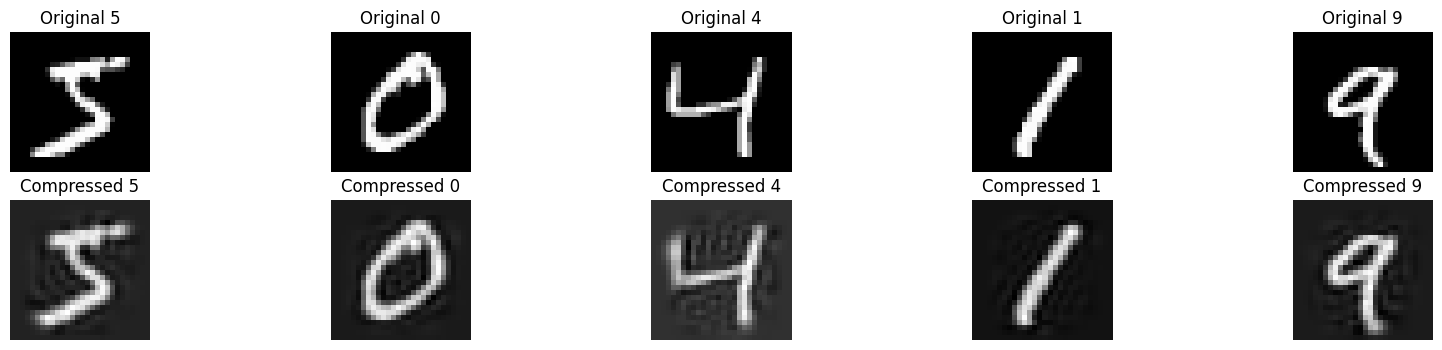

In [24]:
# Reconstruct the compressed images
X_reconstructed = incremental_pca.inverse_transform(X_reduced_ipca)

# Display the original and compressed digits
n_digits = 5  
plt.figure(figsize=(20, 4))
for i in range(n_digits):
    # Original digits
    ax = plt.subplot(2, n_digits, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Original {y[i]}")
    plt.axis('off')

    # Compressed digits
    ax = plt.subplot(2, n_digits, i + 1 + n_digits)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title(f"Compressed {y[i]}")
    plt.axis('off')

plt.show()

# Part B

1. Generate Swiss roll dataset

In [25]:
from sklearn.datasets import make_swiss_roll

X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

2. Plot the resulting generated Swiss roll dataset.

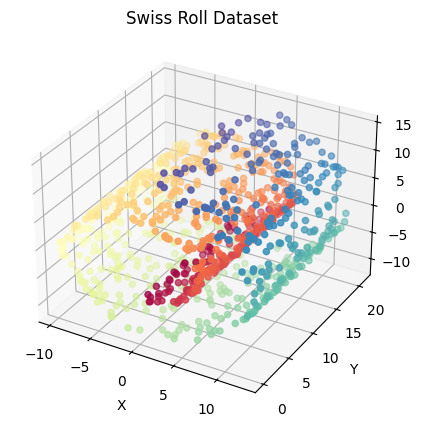

In [26]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Swiss Roll Dataset")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

3. Use Kernel PCA (kPCA) with linear kernel, a RBF kernel, and a sigmoid kernel.

In [27]:
from sklearn.decomposition import KernelPCA

kernels = ['linear', 'rbf', 'sigmoid']
kpca_results = {}

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, random_state=42)
    X_kpca = kpca.fit_transform(X)
    kpca_results[kernel] = X_kpca

4. Plot the kPCA results of applying the linear kernel, RBF kernel, and sigmoid kernel from step 3. Explain and compare the results.

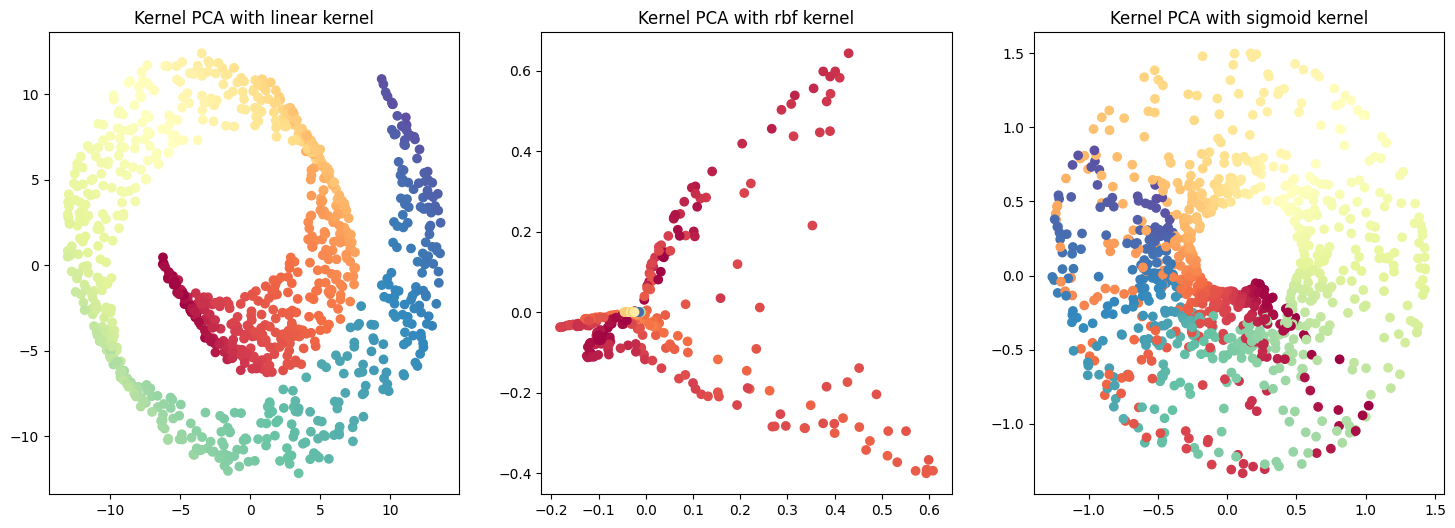

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, kernel in zip(axes, kernels):
    ax.scatter(kpca_results[kernel][:, 0], kpca_results[kernel][:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title(f'Kernel PCA with {kernel} kernel')

plt.show()

5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.

In [29]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Generate the Swiss roll dataset again
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = np.random.randint(0, 2, 1000) # Random binary labels for classification

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(kernel='rbf', n_components=2)),
    ('clf', LogisticRegression(max_iter=1000))
])

In [30]:
# Set up the parameter grid for GridSearchCV
param_grid = {
    'kpca__gamma': np.logspace(-2, 2, 10),
    'kpca__kernel': ['linear', 'rbf', 'sigmoid']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kpca',
                                        KernelPCA(kernel='rbf',
                                                  n_components=2)),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'kpca__gamma': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'kpca__kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [31]:
# Best parameters found by GridSearchCV
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'kpca__gamma': 12.915496650148826, 'kpca__kernel': 'rbf'}


6. Plot the results from using GridSearchCV in step 5.

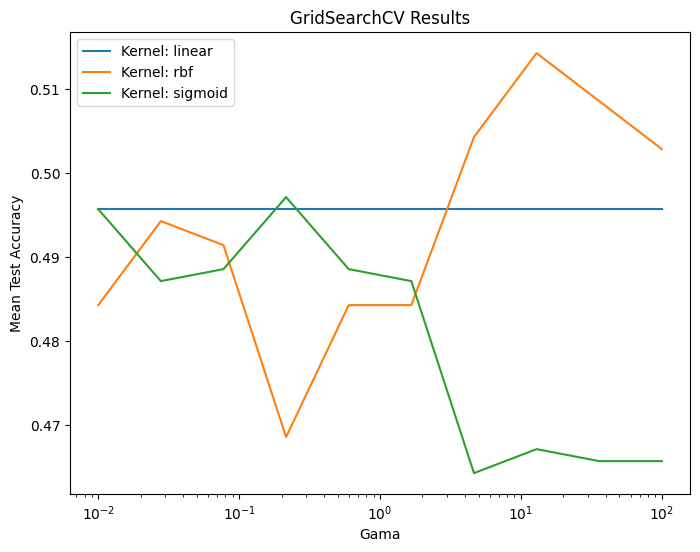

In [32]:
# Extract the results
results = grid_search.cv_results_

# Plot the results
scores = results['mean_test_score'].reshape(len(param_grid['kpca__gamma']),
                                                len(param_grid['kpca__kernel']))

plt.figure(figsize=(8, 6))
for i, kernel in enumerate(param_grid['kpca__kernel']):
    plt.plot(param_grid['kpca__gamma'], scores[:, i], label=f'Kernel: {kernel}')

plt.xlabel('Gama')
plt.ylabel('Mean Test Accuracy')
plt.xscale('log')
plt.title('GridSearchCV Results')
plt.legend()
plt.show()